In [1]:
import pymc3 as pm
import komatsu
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.size"] = 18

In [2]:
hasaki_names, hasaki = komatsu.load_data(komatsu.HASAKI_NAMES, komatsu.HASAKI)
mamouryo_names, mamouryo = komatsu.load_data(komatsu.MAMOURYO_NAMES, komatsu.MAMOURYO)
sessaku_names, sessaku = komatsu.load_data(komatsu.SESSAKU_NAMES, komatsu.SESSAKU)

In [3]:
MAMOURYO_INDEX = 0
SESSAKU_INDEX = 10

In [4]:
raw_y = mamouryo[MAMOURYO_INDEX]
raw_X = sessaku[SESSAKU_INDEX]
print(raw_y.shape, raw_X.shape)

(50,) (50,)


In [5]:
def sort_dataset_along_X(rX, ry):
    X_index = np.argsort(rX, axis=0)
    X = rX[X_index].squeeze()
    y = ry[X_index].squeeze()
    return (X, y)

In [6]:
X, y = sort_dataset_along_X(raw_X, raw_y)

In [7]:
print(raw_y.shape, raw_X.shape)

(50,) (50,)


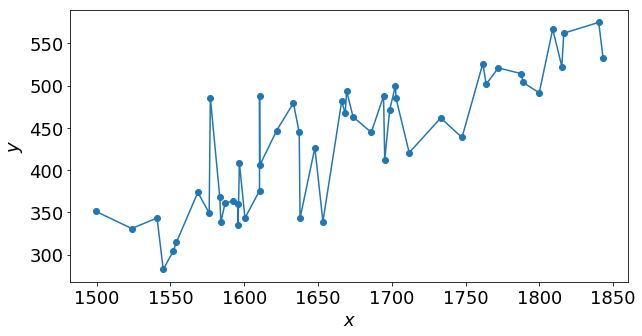

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(X, y, marker="o")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

In [9]:
with pm.Model() as model:
#     alphas = pm.Gamma("alphas", alpha=1e-6, beta=1e-6)
#     beta = pm.Gamma("beta", alpha=0.1, beta=0.1)
    alphas = pm.HalfNormal("alphas", sd=1)
    beta = pm.HalfNormal("beta", sd=1)
    
    w = pm.Normal("w", mu=0.0, tau=alphas)
    z = pm.Normal("z", mu=X * w, tau=beta, observed=y)
    trace = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [w, beta, alphas]
Sampling 2 chains: 100%|██████████| 5000/5000 [02:04<00:00, 40.20draws/s] 
/Users/kumada/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/Users/kumada/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))
The acceptance probability does not match the target. It is 0.9999932421502188, but shou

In [10]:
pm.summary(trace).round(2)

/Users/kumada/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/Users/kumada/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
w,0.26,0.00,0.00,0.25,0.27,1798.16,1.00
alphas,0.87,0.44,0.02,0.01,1.79,172.42,1.04
beta,0.00,0.00,0.00,0.00,0.00,212.42,1.00


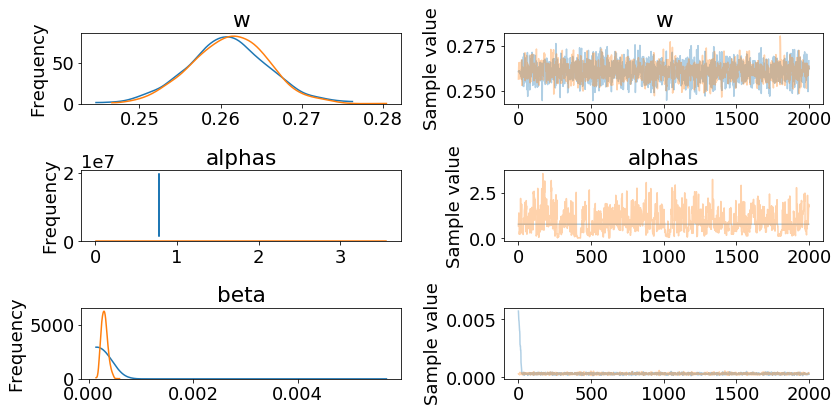

In [11]:
pm.traceplot(trace)
plt.show()

In [12]:
sample_size = trace["w"].shape
print(sample_size)

(4000,)


In [13]:
ppc = pm.sample_posterior_predictive(trace, samples=1000, model=model)

100%|██████████| 1000/1000 [00:00<00:00, 1825.71it/s]


In [15]:
ppc_z = ppc["z"]
ppc_z.shape

(1000, 50)

In [16]:
ppc_z_mean = np.mean(ppc_z, axis=0)
ppc_z_std = np.std(ppc_z, axis=0)
print(ppc_z_mean.shape)
print(ppc_z_std.shape)

(50,)
(50,)


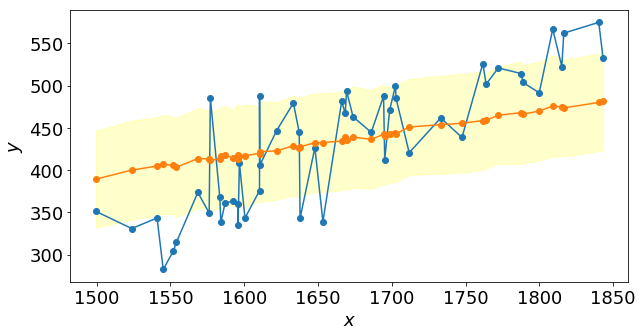

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(X, y, marker="o")
plt.plot(X, ppc_z_mean, marker="o")

plt.xlabel("$x$")
plt.ylabel("$y$")

plt.fill_between(X, ppc_z_mean - ppc_z_std, ppc_z_mean + ppc_z_std, color='yellow', alpha=0.2)

plt.show()

In [3]:
y = mamouryo[0]
X = np.transpose(hasaki, (1, 0))
print("(X.shape,y.shape)=({},{})".format(X.shape, y.shape))

(X.shape,y.shape)=((50, 37),(50,))


In [8]:
n_features = X.shape[1]
with pm.Model() as model:
    alphas = pm.Gamma("alpha", alpha=1e-6, beta=1e-6, shape=(n_features,))
    beta = pm.Gamma("beta", alpha=0.1, beta=0.1, shape=(1,))
    w = pm.Normal("w", mu=0.0, tau=alphas, shape=(n_features,))
    y = pm.Normal("y", mu=X.dot(w), tau=beta, observed=y)
    trace = pm.sample(1000)

AsTensorError: ('Cannot convert [[Elemwise{mul,no_inplace}.0 Elemwise{mul,no_inplace}.0\n  Elemwise{mul,no_inplace}.0 ... Elemwise{mul,no_inplace}.0\n  Elemwise{mul,no_inplace}.0 Elemwise{mul,no_inplace}.0]\n [Elemwise{mul,no_inplace}.0 Elemwise{mul,no_inplace}.0\n  Elemwise{mul,no_inplace}.0 ... Elemwise{mul,no_inplace}.0\n  Elemwise{mul,no_inplace}.0 Elemwise{mul,no_inplace}.0]\n [Elemwise{mul,no_inplace}.0 Elemwise{mul,no_inplace}.0\n  Elemwise{mul,no_inplace}.0 ... Elemwise{mul,no_inplace}.0\n  Elemwise{mul,no_inplace}.0 Elemwise{mul,no_inplace}.0]\n ...\n [Elemwise{mul,no_inplace}.0 Elemwise{mul,no_inplace}.0\n  Elemwise{mul,no_inplace}.0 ... Elemwise{mul,no_inplace}.0\n  Elemwise{mul,no_inplace}.0 Elemwise{mul,no_inplace}.0]\n [Elemwise{mul,no_inplace}.0 Elemwise{mul,no_inplace}.0\n  Elemwise{mul,no_inplace}.0 ... Elemwise{mul,no_inplace}.0\n  Elemwise{mul,no_inplace}.0 Elemwise{mul,no_inplace}.0]\n [Elemwise{mul,no_inplace}.0 Elemwise{mul,no_inplace}.0\n  Elemwise{mul,no_inplace}.0 ... Elemwise{mul,no_inplace}.0\n  Elemwise{mul,no_inplace}.0 Elemwise{mul,no_inplace}.0]] to TensorType', <class 'numpy.ndarray'>)

In [10]:
y = pm.Binomial.dist(n=10, p=0.5)

In [4]:
w = pm.Normal.dist(mu=0.0, tau=1)

In [5]:
y = w.random(size=37)
y.shape

(37,)

In [7]:
z = X.dot(y)
z.shape

(50,)